# FCIM.M.IA - Artificial Intelligence

> **Lab 4:** Linear Regression \\
> **Performed by:** Trifan Denis, group TI-231M \\
> **Verified by:** Mihail Gavrilita, asist. univ.

## Imports and Utils

In [37]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats

## Task 1 -- Import your data. Analyze it via common statistical approaches. Cleanse the data if necessary.

In [5]:
def retrieve_and_filter_dataset_from_file(file_path):
    # add names for columns
    columns = ['data1', 'data2', 'complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants',
               'apartmentsNr', 'data8', 'medianCompexValue']

    # read csv file associated
    df = pd.read_csv(file_path, names=columns)

    # filter only columns needed for regression
    selected_fields = df[['complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants',
                          'apartmentsNr', 'medianCompexValue']]

    return selected_fields

# TASK 1.1 - Import your data
file_location = 'apartmentComplexData.txt'
retrieved_columns = retrieve_and_filter_dataset_from_file(file_location)
print(retrieved_columns)

       complexAge  totalRooms  totalBedrooms  complexInhabitants  \
0            41.0       880.0          129.0               322.0   
1            21.0      7099.0         1106.0              2401.0   
2            52.0      1467.0          190.0               496.0   
3            52.0      1274.0          235.0               558.0   
4            52.0      1627.0          280.0               565.0   
...           ...         ...            ...                 ...   
20635        25.0      1665.0          374.0               845.0   
20636        18.0       697.0          150.0               356.0   
20637        17.0      2254.0          485.0              1007.0   
20638        18.0      1860.0          409.0               741.0   
20639        16.0      2785.0          616.0              1387.0   

       apartmentsNr  medianCompexValue  
0             126.0           452600.0  
1            1138.0           358500.0  
2             177.0           352100.0  
3             219.0


Dataset statistics:
         complexAge    totalRooms  totalBedrooms  complexInhabitants  \
count  20640.000000  20640.000000   20640.000000        20640.000000   
mean      28.639486   2635.763081     537.898014         1425.476744   
std       12.585558   2181.615252     421.247906         1132.462122   
min        1.000000      2.000000       1.000000            3.000000   
25%       18.000000   1447.750000     295.000000          787.000000   
50%       29.000000   2127.000000     435.000000         1166.000000   
75%       37.000000   3148.000000     647.000000         1725.000000   
max       52.000000  39320.000000    6445.000000        35682.000000   

       apartmentsNr  medianCompexValue  
count  20640.000000       20640.000000  
mean     499.539680      206855.816909  
std      382.329753      115395.615874  
min        1.000000       14999.000000  
25%      280.000000      119600.000000  
50%      409.000000      179700.000000  
75%      605.000000      264725.000000  
ma

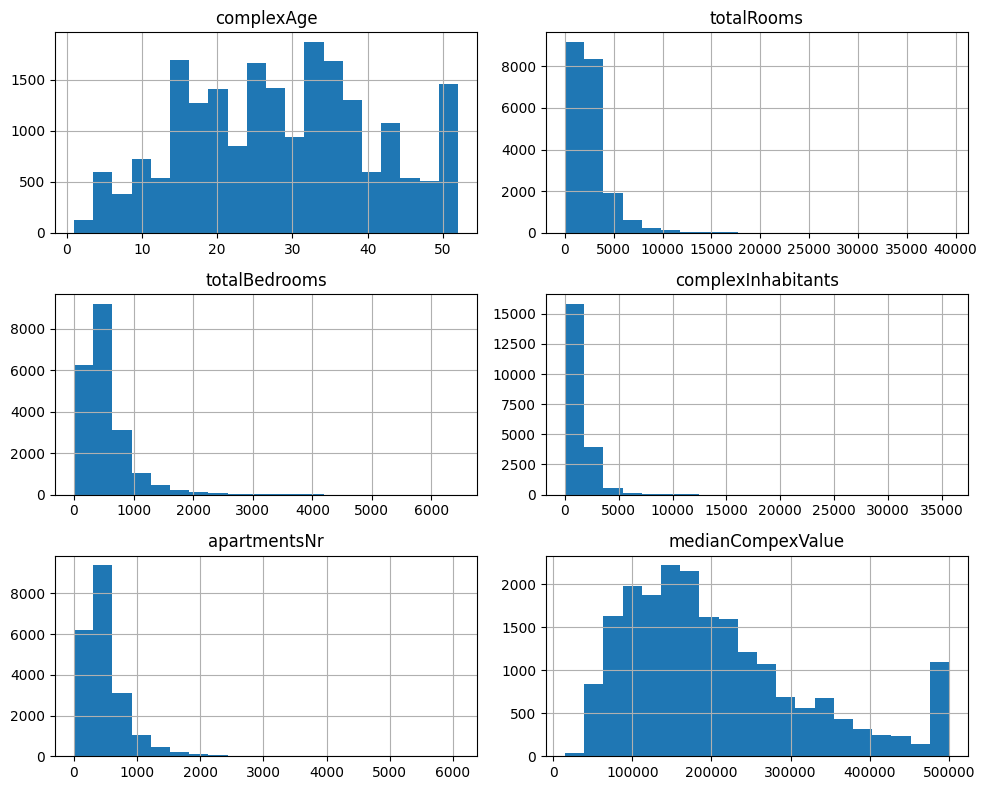

In [18]:
def analyze_with_common_statistical_approach(dataset):
    # display all rows and columns
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)

    # describe dataset displaying stat metrics - mean, min, quantiles (25, 50, 75), max
    print("\nDataset statistics:")
    print(dataset.describe())

    # check for null fields in each column
    print("\nCalculate number of null values across columns:")
    print(dataset.isnull().sum())

    # calculate Pearson correlation coefficient
    print("\nPearson correlation matrix:")
    print(dataset.corr())

    # histogram for each column
    dataset.hist(bins=20, figsize=(10, 8))
    plt.tight_layout()
    plt.show()

# TASK 1.2 - Analyze it via common statistical approaches
analyze_with_common_statistical_approach(retrieved_columns)


IQR after Z-score cleaning dataset:
         complexAge    totalRooms  totalBedrooms  complexInhabitants  \
count  17597.000000  17597.000000   17597.000000        17597.000000   
mean      29.498835   2121.543445     438.412400         1179.292948   
std       12.226604   1061.444050     214.649373          583.596927   
min        1.000000      2.000000       2.000000            3.000000   
25%       19.000000   1369.000000     284.000000          761.000000   
50%       30.000000   1970.000000     408.000000         1101.000000   
75%       38.000000   2756.000000     569.000000         1539.000000   
max       52.000000   5438.000000    1122.000000         2998.000000   

       apartmentsNr  medianCompexValue  
count  17597.000000       17597.000000  
mean     410.513269      188903.011650  
std      199.287498       95647.325889  
min        2.000000       14999.000000  
25%      269.000000      113300.000000  
50%      384.000000      170800.000000  
75%      533.000000      24

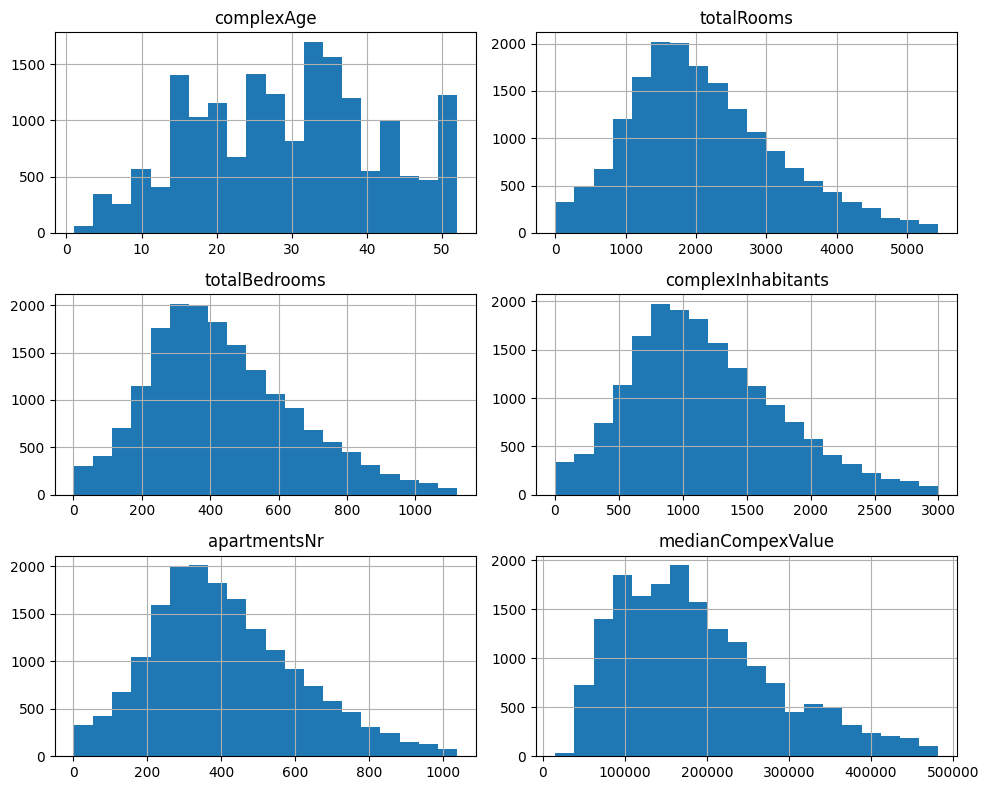

In [19]:
def z_score_cleaning(dataset):
    # calculate Z-scores for each column
    z_scores = stats.zscore(dataset.dropna())
    # define threshold for Z-score
    threshold = 3
    # create a mask for outliers
    outlier_mask = (abs(z_scores) > threshold).any(axis=1)
    # filter the dataset to remove outliers
    filtered_data_zscore = dataset[~outlier_mask]

    return filtered_data_zscore


def iqr_cleaning(dataset):
    # calculate the first quartile (Q1) and third quartile (Q3) for each column
    Q1 = dataset.quantile(0.25)
    Q3 = dataset.quantile(0.75)
    IQR = Q3 - Q1
    # create a mask for outliers using IQR
    outlier_mask_iqr = ((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)
    # filter the dataset to remove outliers detected by IQR
    filtered_data_iqr = dataset[~outlier_mask_iqr]

    return filtered_data_iqr


def mixed_cleaning(dataset):
    z_score_cleaned_dataset = z_score_cleaning(dataset)
    mixed_cleaned_dataset = iqr_cleaning(z_score_cleaned_dataset)
    return mixed_cleaned_dataset

mixed_cleaned = mixed_cleaning(retrieved_columns)
print("\nIQR after Z-score cleaning dataset:")
print(mixed_cleaned.describe())

# histogram for each column
mixed_cleaned.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

## Task 2 -- Train your model by applying linear regression

Train Mean Squared Error (MSE): 7525085922.910388
Test Mean Squared Error (MSE): 7791860183.132126
Train R-squared (R2) Score: 0.17225242997101575
Test R-squared (R2) Score: 0.16815577459866304


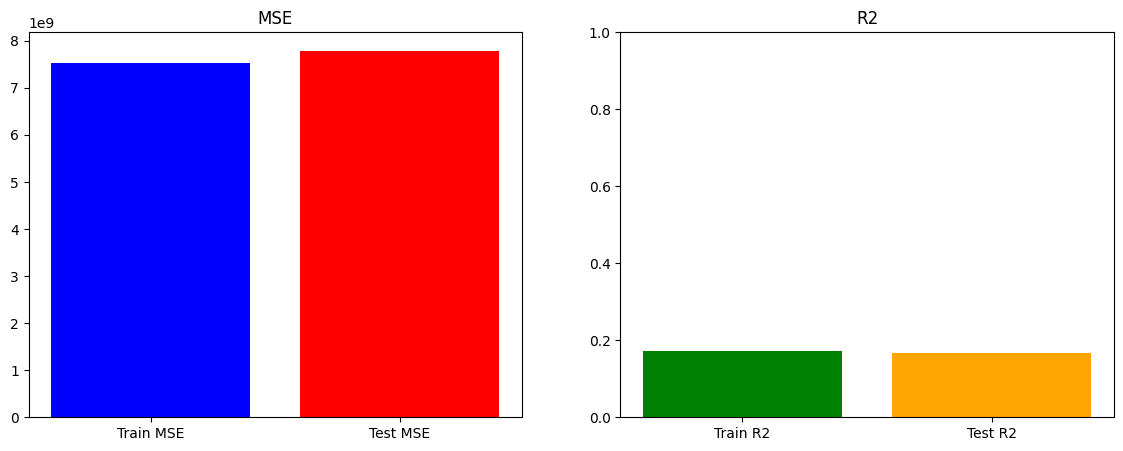

In [57]:
def retrieve_linear_regression_model(dataset):
    # split dataset in independent and dependent value - cols 3,4,5,6,7 are independent
    x = dataset[['complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants', 'apartmentsNr']]
    # col 9 is dependent
    y = dataset['medianCompexValue']

    # split data in training 80% and test 20% with random seed 0
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

    model = LinearRegression()
    model.fit(x_train, y_train)

    return model, x_train, x_test, y_train, y_test


def get_stats_for_model(model, x_train, x_test, y_train, y_test):
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)

    return test_mse, train_mse, test_r2, train_r2


def display_stats(test_mse, train_mse, test_r2, train_r2):
    print(f'Train Mean Squared Error (MSE): {train_mse}')
    print(f'Test Mean Squared Error (MSE): {test_mse}')
    print(f'Train R-squared (R2) Score: {train_r2}')    
    print(f'Test R-squared (R2) Score: {test_r2}')

    metrics_mse = ['Train MSE', 'Test MSE']
    values_mse = [train_mse, test_mse]
    metrics_r2 = ['Train R2', 'Test R2']
    values_r2 = [train_r2, test_r2]

    fig, ax = plt.subplots(1, 2, figsize=(14,5))
    ax[0].bar(metrics_mse, values_mse, color=['blue', 'red'])
    ax[0].set_title('MSE')

    ax[1].bar(metrics_r2, values_r2, color=['green', 'orange'])
    ax[1].set_title('R2')
    ax[1].set_ylim(0, 1)

    plt.show()

mixed_cleaned = mixed_cleaning(retrieved_columns)
model, x_train, x_test, y_train, y_test = retrieve_linear_regression_model(mixed_cleaned)
test_mse, train_mse, test_r2, train_r2 = get_stats_for_model(model, x_train, x_test, y_train, y_test)
display_stats(test_mse, train_mse, test_r2, train_r2)

## Task 3 -- Show the prediction power of your model by attempting to predict the price of a new house.

Predicted Price for the New House: $ 219976.6117343233


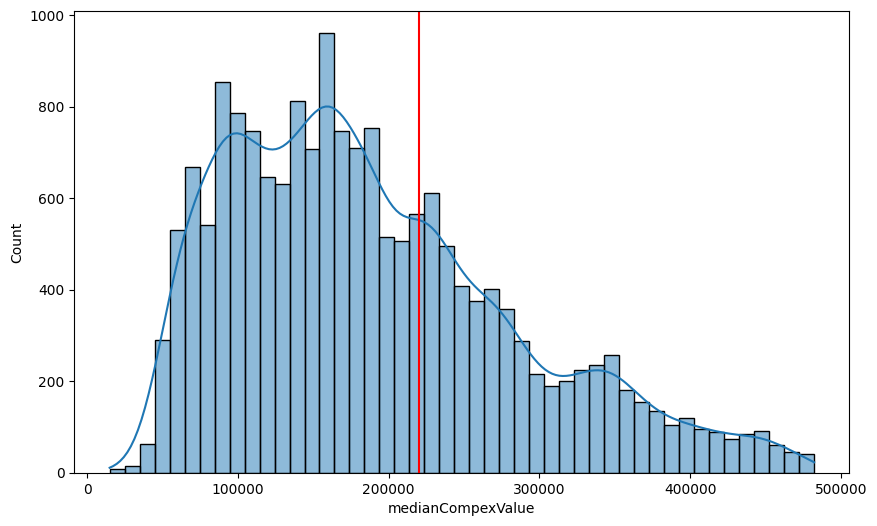

In [58]:
def predict_price(model):
    new_house = {
        'complexAge' : [10],
        'totalRooms' : [3000],
        'totalBedrooms' : [500],
        'complexInhabitants' : [800],
        'apartmentsNr' : [400]
    }

    new_house_df = pd.DataFrame(new_house, columns=['complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants', 'apartmentsNr'])
    predicted_price = model.predict(new_house_df)
    print(f'Predicted Price for the New House: $ {predicted_price[0]}')
    return predicted_price[0]

mixed_cleaned = mixed_cleaning(retrieved_columns)
model, _, _, _, _ = retrieve_linear_regression_model(mixed_cleaned)
predicted_price = predict_price(model)

plt.figure(figsize=(10,6))
sns.histplot(mixed_cleaned['medianCompexValue'], kde=True)
plt.axvline(x=predicted_price, color='red')
plt.show()

## Task 4 -- Re-train your model. Use Ridge, Lasso or Elastic Net regularization

Train Mean Squared Error (MSE): 7525085922.910439
Test Mean Squared Error (MSE): 7791860179.454896
Train R-squared (R2) Score: 0.1722524299710102
Test R-squared (R2) Score: 0.16815577499123713


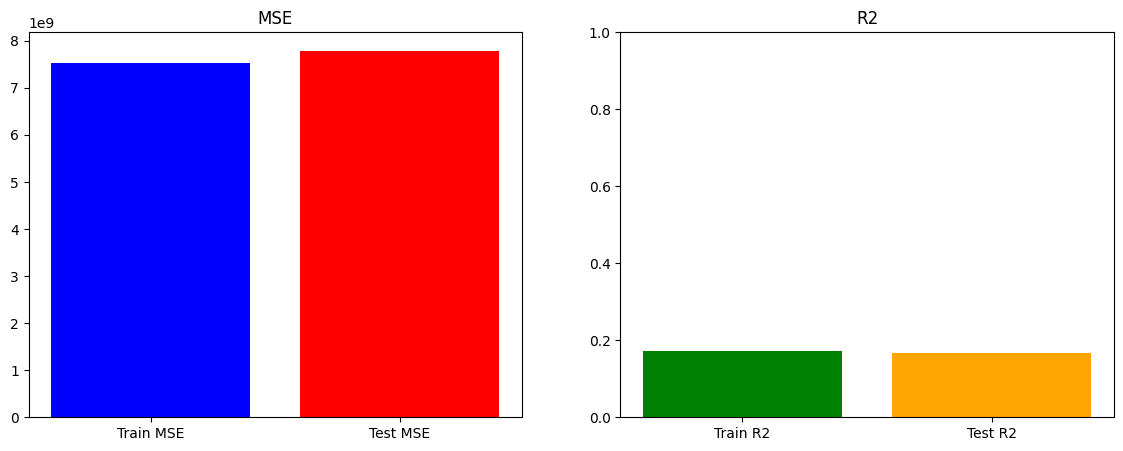

In [59]:
def retrieve_ridge_model(dataset):
    # split dataset in independent and dependent value - cols 3,4,5,6,7 are independent
    x = dataset[['complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants', 'apartmentsNr']]
    # col 9 is dependent
    y = dataset['medianCompexValue']

    # split data in training 80% and test 20% with random seed 0
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

    model = Ridge(alpha=1.0)
    model.fit(x_train, y_train)

    return model, x_train, x_test, y_train, y_test

mixed_cleaned = mixed_cleaning(retrieved_columns)
model, x_train, x_test, y_train, y_test = retrieve_ridge_model(mixed_cleaned)
test_mse, train_mse, test_r2, train_r2 = get_stats_for_model(model, x_train, x_test, y_train, y_test)
display_stats(test_mse, train_mse, test_r2, train_r2)

Train Mean Squared Error (MSE): 7525085922.910475
Test Mean Squared Error (MSE): 7791860174.549112
Train R-squared (R2) Score: 0.1722524299710062
Test R-squared (R2) Score: 0.1681557755149693


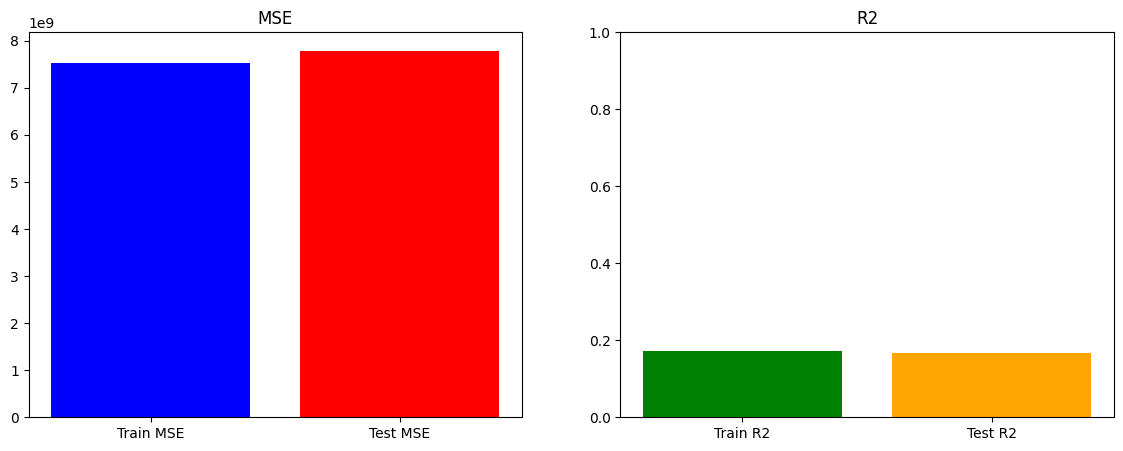

In [60]:
def retrieve_lasso_model(dataset):
    # split dataset in independent and dependent value - cols 3,4,5,6,7 are independent
    x = dataset[['complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants', 'apartmentsNr']]
    # col 9 is dependent
    y = dataset['medianCompexValue']

    # split data in training 80% and test 20% with random seed 0
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

    model = Lasso(alpha=0.1)
    model.fit(x_train, y_train)

    return model, x_train, x_test, y_train, y_test

mixed_cleaned = mixed_cleaning(retrieved_columns)
model, x_train, x_test, y_train, y_test = retrieve_lasso_model(mixed_cleaned)
test_mse, train_mse, test_r2, train_r2 = get_stats_for_model(model, x_train, x_test, y_train, y_test)
display_stats(test_mse, train_mse, test_r2, train_r2)

Train Mean Squared Error (MSE): 7525085948.643226
Test Mean Squared Error (MSE): 7791857617.269099
Train R-squared (R2) Score: 0.1722524271404443
Test R-squared (R2) Score: 0.16815604852533672


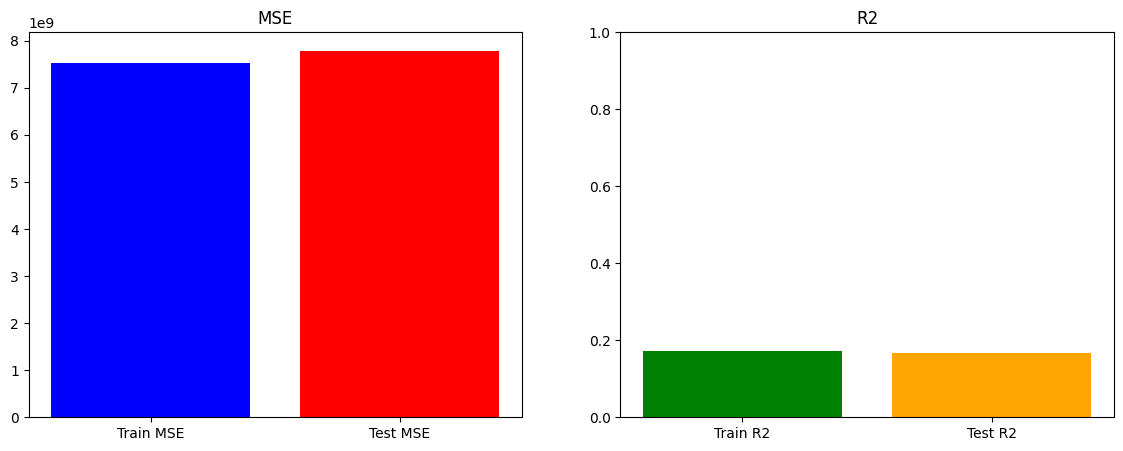

In [61]:
def retrieve_elastic_net_model(dataset):
    # split dataset in independent and dependent value - cols 3,4,5,6,7 are independent
    x = dataset[['complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants', 'apartmentsNr']]
    # col 9 is dependent
    y = dataset['medianCompexValue']

    # split data in training 80% and test 20% with random seed 0
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

    model = ElasticNet(alpha=0.1, l1_ratio=0.5)
    model.fit(x_train, y_train)

    return model, x_train, x_test, y_train, y_test

mixed_cleaned = mixed_cleaning(retrieved_columns)
model, x_train, x_test, y_train, y_test = retrieve_elastic_net_model(mixed_cleaned)
test_mse, train_mse, test_r2, train_r2 = get_stats_for_model(model, x_train, x_test, y_train, y_test)
display_stats(test_mse, train_mse, test_r2, train_r2)

## Task 5 -- Score and compare the scores of the models you have implemented. Interpret the result.

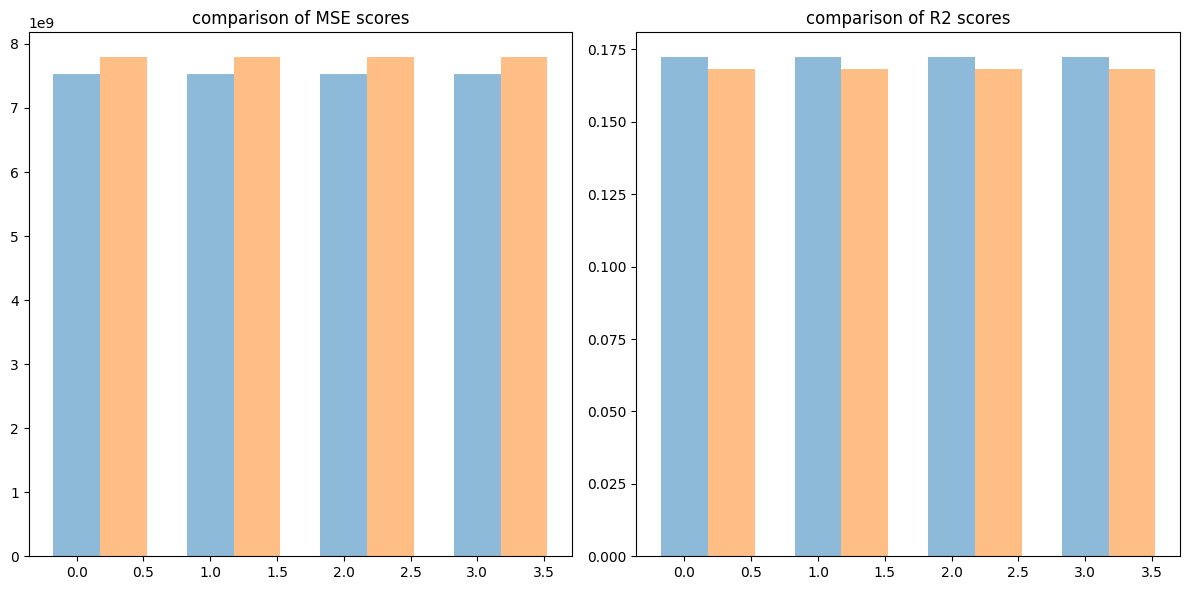

In [63]:
models = ['Linear', 'Ridge', 'Lasso', 'Elastic Net']

mixed_cleaned = mixed_cleaning(retrieved_columns)

model_linear, x_train_linear, x_test_linear, y_train_linear, y_test_linear = retrieve_linear_regression_model(mixed_cleaned)
test_mse_linear, train_mse_linear, test_r2_linear, train_r2_linear = get_stats_for_model(model_linear, x_train_linear, x_test_linear, y_train_linear, y_test_linear)

model_ridge, x_train_ridge, x_test_ridge, y_train_ridge, y_test_ridge = retrieve_ridge_model(mixed_cleaned)
test_mse_ridge, train_mse_ridge, test_r2_ridge, train_r2_ridge = get_stats_for_model(model_ridge, x_train_ridge, x_test_ridge, y_train_ridge, y_test_ridge)

model_lasso, x_train_lasso, x_test_lasso, y_train_lasso, y_test_lasso = retrieve_lasso_model(mixed_cleaned)
test_mse_lasso, train_mse_lasso, test_r2_lasso, train_r2_lasso = get_stats_for_model(model_lasso, x_train_lasso, x_test_lasso, y_train_lasso, y_test_lasso)

model_elastic, x_train_elastic, x_test_elastic, y_train_elastic, y_test_elastic = retrieve_elastic_net_model(mixed_cleaned)
test_mse_elastic, train_mse_elastic, test_r2_elastic, train_r2_elastic = get_stats_for_model(model_elastic, x_train_elastic, x_test_elastic, y_train_elastic, y_test_elastic)

train_mse_scores = [train_mse_linear, train_mse_ridge, train_mse_lasso, train_mse_elastic]
test_mse_scores = [test_mse_linear, test_mse_ridge, test_mse_lasso, test_mse_elastic]
train_r2_scores = [train_r2_linear, train_r2_ridge, train_r2_lasso, train_r2_elastic]
test_r2_scores = [test_r2_linear, test_r2_ridge, test_r2_lasso, test_r2_elastic]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
index=range(len(models))
plt.bar(index, train_mse_scores, 0.35, alpha=0.5, label='Train MSE')
plt.bar([i+0.35 for i in index], test_mse_scores, 0.35, alpha=0.5, label='Test MSE')
plt.title('comparison of MSE scores')

plt.subplot(1,2,2)
index=range(len(models))
plt.bar(index, train_r2_scores, 0.35, alpha=0.5, label='Train R2')
plt.bar([i+0.35 for i in index], test_r2_scores, 0.35, alpha=0.5, label='Test R2')
plt.title('comparison of R2 scores')

plt.tight_layout()
plt.show()

## Conclusions:

During this work I studied Linear Regression based on some dataset about apartments, that have independent and dependent values needed for calculation. Cleaned dataset, trained and applied all types of regression for comparison.

## Bibliography:

1. Ridge Regression : https://medium.com/@bernardolago/mastering-ridge-regression-a-key-to-taming-data-complexity-98b67d343087
2. Linear Regression : https://medium.com/@shuv.sdr/simple-linear-regression-in-python-a0069b325bf8
3. Regularization: Ridge, Lasso, ElasticNet : https://medium.com/@creatrohit9/lasso-ridge-elastic-net-regression-a-complete-understanding-2021-b335d9e8ca3